# EECS 475 Assignment 3

## Student Name: Mingfu Liang

## Email: mingfuliang2020@u.northwestern.edu

Please perform the following exercises, each of which is worth $10$ points.  The instructions for most can be found at the end of the Chapter notes, however several include additional information / starter code which is provided below.  **Use the version of the chapter notes included in this homework folder to complete the exercises.**

 - **Chapter 9:** Exercise 2
 
 - **Chapter 10:** Exercises 1,2, and 9

# Exercise 9.2: MNIST classification: pixels vs edge-based features

Load in data.

In [840]:
from autograd import numpy as np
from sklearn.datasets import fetch_mldata
import math
import pandas as pd
# Change data_home to wherever to where you want to download your data
mnist = fetch_mldata('MNIST original')

# strip off input / output pairs
x = mnist.data.T
y = mnist.target[np.newaxis,:]

print("input shape = " , x.shape)
print("output shape = ", y.shape)

input shape =  (784, 70000)
output shape =  (1, 70000)


Then we visualize the original data:

In [841]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [842]:
y

array([[0., 0., 0., ..., 9., 9., 9.]])

Randomly sample input / output pairs.

In [843]:
# sample indices
num_sample = 50000
inds = np.random.permutation(y.shape[1])[:num_sample]
x_sample = x[:,inds]
y_sample = y[:,inds]

Then we visualize the sample data:

In [844]:
x_sample

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [845]:
np.unique(x_sample)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [846]:
y_sample

array([[3., 2., 4., ..., 8., 1., 7.]])

Use a backend file to extract edge-based histogram features from the raw input.

In [847]:
# extract edge-based features
import data_transformer
x_sample_edgebased_features = data_transformer.edge_transformer(x_sample)   

print('shape of original input ', x_sample.shape)
print('shape of transformed input ', x_sample_edgebased_features.shape)

shape of original input  (784, 50000)
shape of transformed input  (1352, 50000)


Then we visualize the edgedbased sample data:

In [848]:
x_sample_edgebased_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [849]:
np.unique(x_sample_edgebased_features)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

Now we defined the linear combinations of input point and multiclass softmax cost function:

In [850]:
# compute C linear combinations of input point, one per classifier
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# multiclass softmax 
lam = 10**(-5)  # our regularization paramter 
def multiclass_softmax_pixel(w):        
    # pre-compute predictions on all points
    all_evals = model(x_sample,w)
    
    # compute softmax across data points
    a = np.log(np.sum(np.exp(all_evals),axis = 0)) 
    
    # compute cost in compact form using numpy broadcasting
    b = all_evals[y_sample.astype(int).flatten(),np.arange(np.size(y_sample))]
    cost = np.sum(a - b)
    
    # add regularizer
    cost = cost + lam*np.linalg.norm(w[1:,:],'fro')**2
    
    # return average
    return cost/float(np.size(y))

Then we define the gradient descent algorithm:

In [851]:
from autograd import grad 
import autograd.numpy as np   
from autograd import value_and_grad 
import matplotlib.pyplot as plt

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
        if math.fmod(k,100)==0:
            print(k)
        
    return weight_history,cost_history

Then we define the dimension of weight which related to $x$ and $y$:

In [852]:
x_dim = x.shape[0] +1 
y_label = len(pd.unique(y_sample[0]))

In [853]:
x_dim

785

In [854]:
math.fmod(10,10)

0.0

Now we define the parameter and minimize the multiclass softmax cost function based on pixel feature:

In [855]:
g = multiclass_softmax_pixel; w = 0.0000000000001*np.random.randn(x_dim, y_label); max_its = 200; alpha_choice = 0.000001;
weight_history,cost_history = gradient_descent(g,alpha_choice,max_its,w)

0
100


Since $w$ is randomized, therefore we want to know in each experiment what $w$ is using and we print it out as following:

In [856]:
w

array([[-2.02056050e-14,  1.71791497e-13, -1.86169509e-14, ...,
         4.20046651e-14, -2.18567828e-14,  1.18167250e-13],
       [-1.91149135e-14,  2.02328123e-14,  6.84080154e-14, ...,
         9.60913195e-14,  3.25416553e-14, -1.08943037e-13],
       [ 1.36352391e-13, -2.70665870e-14, -1.55043221e-13, ...,
         2.20918764e-13, -2.42567294e-14, -4.58048985e-14],
       ...,
       [-1.22230237e-13, -1.04962839e-13, -1.16540041e-13, ...,
         1.06478234e-13,  7.80520934e-14,  3.56184589e-14],
       [-8.90483496e-14, -1.59689786e-13, -9.08890438e-15, ...,
        -1.72906198e-13, -8.96227869e-14,  7.93296145e-14],
       [-4.93148958e-15,  1.00491898e-13, -5.78859559e-14, ...,
         1.33959494e-14,  5.35636364e-15, -1.81283723e-14]])

Then we visualize the last round weight history and cost history:

In [857]:
weight_history[-1]

array([[-7.31498036e-07,  1.63876721e-06, -3.83519096e-07, ...,
         7.44861561e-07, -1.67802819e-06, -2.09616425e-07],
       [-1.91149135e-14,  2.02328123e-14,  6.84080154e-14, ...,
         9.60913195e-14,  3.25416553e-14, -1.08943037e-13],
       [ 1.36352391e-13, -2.70665870e-14, -1.55043221e-13, ...,
         2.20918764e-13, -2.42567294e-14, -4.58048985e-14],
       ...,
       [-1.22230237e-13, -1.04962839e-13, -1.16540041e-13, ...,
         1.06478234e-13,  7.80520934e-14,  3.56184589e-14],
       [-8.90483496e-14, -1.59689786e-13, -9.08890438e-15, ...,
        -1.72906198e-13, -8.96227869e-14,  7.93296145e-14],
       [-4.93148958e-15,  1.00491898e-13, -5.78859559e-14, ...,
         1.33959494e-14,  5.35636364e-15, -1.81283723e-14]])

In [858]:
cost_history[-1]

0.4440889731429351

Then we define the cost function history plotter to visualize the cost function history:

In [859]:
%matplotlib inline
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

Now we plot the cost history of multiclass softmax cost based on pixel feature as below:

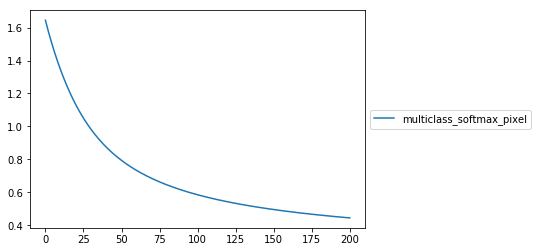

In [860]:
plot_cost_histories([cost_history],labels = [r'multiclass_softmax_pixel'])

Now we define multiclass softmax cost function based on edge feature:

In [861]:
# multiclass softmax 
lam = 10**(-5)  # our regularization paramter 
def multiclass_softmax_edgebased(w):        
    # pre-compute predictions on all points
    all_evals = model(x_sample_edgebased_features,w)
    
    # compute softmax across data points
    a = np.log(np.sum(np.exp(all_evals),axis = 0)) 
    
    # compute cost in compact form using numpy broadcasting
    b = all_evals[y_sample.astype(int).flatten(),np.arange(np.size(y_sample))]
    cost = np.sum(a - b)
    
    # add regularizer
    cost = cost + lam*np.linalg.norm(w[1:,:],'fro')**2
    
    # return average
    return cost/float(np.size(y))

Then we define the weight dimension based on the edge based feature:

In [862]:
x_sample_edgebased_features_dim = x_sample_edgebased_features.shape[0] + 1 

Now we define the parameter and minimize the multiclass softmax cost function based on edge feature:

In [863]:
g = multiclass_softmax_edgebased; w = 0.0000000000001*np.random.randn(x_sample_edgebased_features_dim, y_label); max_its = 200; alpha_choice = 0.000001;
weight_history_edgebased,cost_history_edgebased = gradient_descent(g,alpha_choice,max_its,w)

0
100


Since $w$ is randomized, therefore we want to know in each experiment what $w$ is using and we print it out as following:

In [864]:
w

array([[ 5.40634604e-14, -7.40448528e-14,  4.76653360e-14, ...,
         1.48033324e-14,  9.62224056e-14,  6.82978961e-14],
       [ 1.59409796e-13, -1.14312650e-13,  8.68367005e-14, ...,
        -1.79024582e-13, -1.40289152e-13, -1.71636304e-14],
       [ 2.95273734e-13,  3.28001533e-14, -3.39407556e-15, ...,
         2.08391012e-14, -2.69857873e-13,  2.61692547e-14],
       ...,
       [-7.36843152e-14,  1.29085097e-14, -2.36163141e-13, ...,
        -1.19281676e-14,  5.16943857e-14, -1.71665646e-14],
       [ 7.83147498e-14, -1.87432751e-13, -1.22968507e-13, ...,
        -3.80467700e-14, -7.31160839e-14, -4.63291102e-14],
       [-3.87990362e-14,  2.44762817e-13, -2.49246473e-14, ...,
        -6.74344928e-14, -6.73566557e-14, -4.94256302e-14]])

In [865]:
weight_history_edgebased[-1]

array([[-2.98535319e-08,  3.59476333e-07,  5.90878867e-09, ...,
         1.87389391e-07, -4.92729641e-07, -1.13728728e-07],
       [ 1.22825788e-07, -1.64165314e-09, -2.53797895e-08, ...,
        -1.34506996e-08, -1.05728917e-08, -2.65556926e-08],
       [ 1.22825924e-07, -1.64150603e-09, -2.53798798e-08, ...,
        -1.34504997e-08, -1.05730212e-08, -2.65556493e-08],
       ...,
       [-7.55276307e-07, -8.47881433e-08,  3.73047624e-06, ...,
        -1.53841055e-06, -1.26629201e-06,  5.20707215e-07],
       [-2.53687888e-06, -1.30375535e-06,  1.50300118e-06, ...,
        -8.61432955e-06, -1.24143377e-06,  1.19921949e-05],
       [-2.75647421e-06, -1.40094213e-06,  4.45540176e-06, ...,
        -8.89969413e-06, -1.90492312e-06,  1.14550327e-05]])

In [866]:
cost_history_edgebased[-1]

0.11621384598976625

Now we plot the cost history of multiclass softmax cost based on edge feature as below:

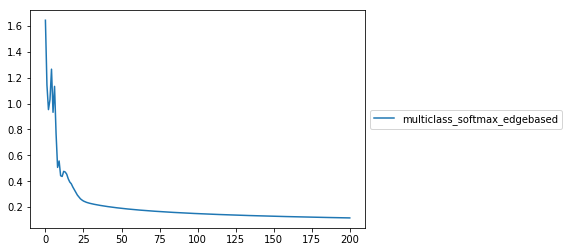

In [867]:
plot_cost_histories([cost_history_edgebased],labels = [r'multiclass_softmax_edgebased'])

Finally, we plot both cost functions on the same image and it is obvious that edge based feature is more effective that pixel based feature since we can see that edge based feature can be optimized to lower cost in less rounds of iteration than pixel based feature.

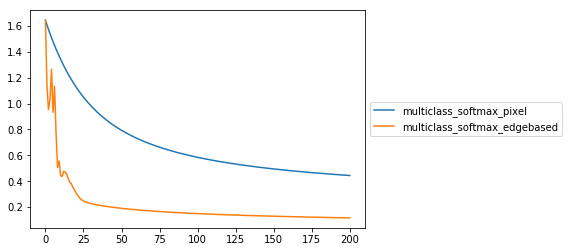

In [868]:
plot_cost_histories([cost_history,cost_history_edgebased],labels = [r'multiclass_softmax_pixel',r'multiclass_softmax_edgebased'])

# Exercise 10.1: Modeling a wave

In [606]:
# libraries
from autograd import numpy as np

# import the dataset
csvname = 'datasets/' + 'noisy_sin_sample.csv'
data = np.loadtxt(csvname,delimiter=',')

# cut into input/output data
x = data[0:-1,:]
y = data[-1:,:]

In [607]:
x

array([[0.68608 , 0.50679 , 0.34545 , 0.7581  , 0.1903  , 0.81336 ,
        0.95399 , 0.17358 , 0.14515 , 0.35531 , 0.59709 , 0.41464 ,
        0.53799 , 0.49533 , 0.4278  , 0.215   , 0.3791  , 0.85292 ,
        0.023528, 0.52766 , 0.52465 ]])

In [608]:
x[0].shape

(21,)

In [156]:
len(x[0])

21

In [157]:
x[0][0]

0.68608

Now we define the standard normalization function for the data $x$ and perform the standard normalization:

In [158]:
def standard_normalizer(x):
        # compute the mean and standard deviation of the input
        x_means = np.mean(x,axis = 1)[:,np.newaxis]
        x_stds = np.std(x,axis = 1)[:,np.newaxis]   
        
        # create standard normalizer function
        for i in range(len(x[0])):
            x[0][i] = (x[0][i] - x_means)/ x_stds

        # return normalizer 
        return x

In [159]:
x = standard_normalizer(x)

In [160]:
x

array([[ 0.88039947,  0.14112979, -0.52412634,  1.17736084, -1.16385913,
         1.40521539,  1.9850776 , -1.23280101, -1.35002694, -0.48347043,
         0.5134654 , -0.23883397,  0.26977731,  0.09387656, -0.1845711 ,
        -1.06201318, -0.38537669,  1.56833385, -1.85151312,  0.22718343,
         0.21477225]])

Then we define the feature transforms function and the model function to compute linear combination:

In [161]:
def feature_transforms(x,w):
    # calculate feature transform
    f = np.sin(w[0] + np.dot(x.T,w[1:])).T
    return f


def model(x,w):
    # feature transformation 
    f = feature_transforms(x,w[0])
    
    # compute linear combination and return 
    a = w[1][0] + np.dot(f.T,w[1][1:])
    return a.T

We also define the least square cost function as follow:

In [165]:
def least_squares(w):
    # Compute the least squares cost

        cost = np.sum((model(x,w)-y)**2)
        return cost/float(y.size)
f = feature_transforms
g = lambda w: least_squares(w)

Then we define the gradient descent algorithm:

In [166]:
from autograd import grad 
import autograd.numpy as np   
from autograd import value_and_grad 
import matplotlib.pyplot as plt

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
        if math.fmod(k,100)==0:
            print(k)
        
    return weight_history,cost_history

Now we define the parameter and minimize the least square cost function:

In [167]:
w = np.array([0.1*np.random.randn(2,1),0.1*np.random.randn(2,1)])
max_its = 500; alpha_choice = 10**(-1)
weight_history,cost_history = gradient_descent(g,alpha_choice,max_its,w)

0
100
200
300
400


Since $w$ is randomized, therefore we want to know in each experiment what $w$ is using and we print it out as following:

In [168]:
w

array([[[-0.06147697],
        [ 0.00994506]],

       [[-0.10460951],
        [-0.01896602]]])

In [169]:
weight_history[-1]

array([[[-0.1749371 ],
        [ 1.45101257]],

       [[ 0.01516975],
        [-1.01503092]]])

In [170]:
cost_history[-1]

0.039344789120746286

Then we define the cost function history plotter to visualize the cost function history:

In [171]:
%matplotlib inline
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

Now we plot the cost history of least square as below:

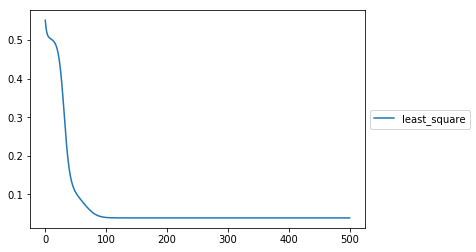

In [172]:
plot_cost_histories([cost_history],labels = [r'least_square'])

To verify my result, I utilize the nonlinear superlearn library from professor's [github](https://github.com/jermwatt/mlrefined/tree/gh-pages/mlrefined_libraries/nonlinear_superlearn_library):

In [173]:
import sys
sys.path.append('../')
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import nonlinear_superlearn_library as nonlib

regress_plotter = nonlib.nonlinear_regression_demos
static_plotter = optlib.static_plotter.Visualizer()
basic_runner = nonlib.basic_runner

First let us visualize the dataset:

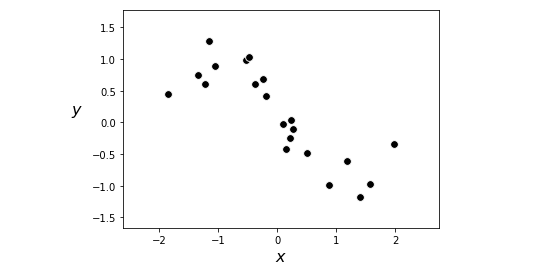

In [174]:
ex10_1 = regress_plotter.Visualizer(data)
ex10_1.plot_data()

Then use the cost histroy and best weight_history from previous calculation, we can plot the green line as follow which fit the dataset:

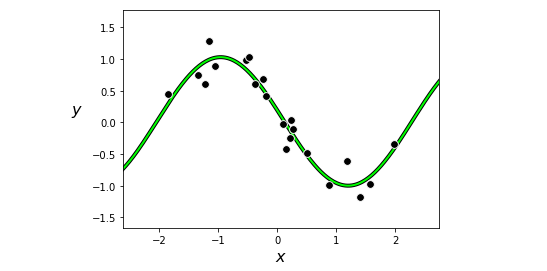

In [175]:
ind = np.argmin(cost_history)
w_best = weight_history[ind]
ex10_1.plot_fit(w_best,model);

Finally, using the weight history from previous calculation, we can reproduce the $Example 10.1$ and both panels shown in $Figure 10.2$

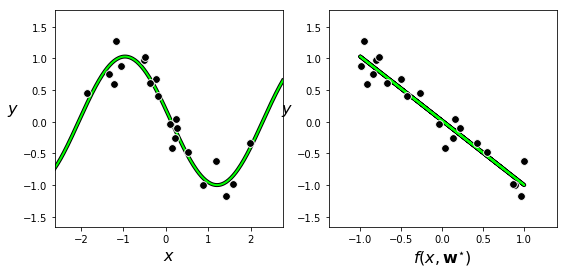

In [177]:
ex10_1.plot_fit_and_feature_space(w_best,model,feature_transforms)

# Exercise 10.2: Modeling population growth

In [208]:
# libraries
from autograd import numpy as np

# import the dataset
csvname = 'datasets/' + 'yeast.csv'
data = np.loadtxt(csvname,delimiter=',')

# cut into input/output data
x = data[0:-1,:]
y = data[-1:,:]

In [209]:
x

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18.]])

First we define the standard normalization function and perform standard normalization as fellow:

In [210]:
def standard_normalizer(x):
        # compute the mean and standard deviation of the input
        x_means = np.mean(x,axis = 1)[:,np.newaxis]
        x_stds = np.std(x,axis = 1)[:,np.newaxis]   
        
        # create standard normalizer function
        for i in range(len(x[0])):
            x[0][i] = (x[0][i] - x_means)/ x_stds

        # return normalizer 
        return x

In [211]:
x = standard_normalizer(x)

Then we define the feature transform function and model function to compute linear combination of input data:

In [212]:
def feature_transforms(x,w):
    # calculate feature transform
    f = np.tanh(w[0] + np.dot(x.T,w[1:])).T
    return f


def model(x,w):
    # feature transformation 
    f = feature_transforms(x,w[0])
    
    # compute linear combination and return 
    a = w[1][0] + np.dot(f.T,w[1][1:])
    return a.T

Then we define the least squares cost function:

In [213]:
def least_squares(w):
    # Compute the least squares cost

        cost = np.sum((model(x,w)-y)**2)
        return cost/float(y.size)
f = feature_transforms
g = lambda w: least_squares(w)

Now we define the gradient descent algorithm:

In [214]:
from autograd import grad 
import autograd.numpy as np   
from autograd import value_and_grad 
import matplotlib.pyplot as plt

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
        if math.fmod(k,100)==0:
            print(k)
        
    return weight_history,cost_history

Then we set the parameters and minimize the least squares cost function: 

In [215]:
w = np.array([0.1*np.random.randn(2,1),0.1*np.random.randn(2,1)])
max_its = 500; alpha_choice = 10**(-1)
weight_history,cost_history = gradient_descent(g,alpha_choice,max_its,w)

0
100
200
300
400


Since $w$ is randomized, therefore we want to know in each experiment what $w$ is using and we print it out as following:

In [216]:
w

array([[[ 0.03049162],
        [ 0.0970297 ]],

       [[ 0.25231718],
        [-0.07215764]]])

In [217]:
weight_history[-1]

array([[[0.30090677],
        [1.36304439]],

       [[0.99784489],
        [1.03129016]]])

In [218]:
cost_history[-1]

0.0003926941051407208

Then we define the cost funciton history plotter to visualize the cost function history:

In [219]:
%matplotlib inline
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

Then we plot the cost history of least square cost function:

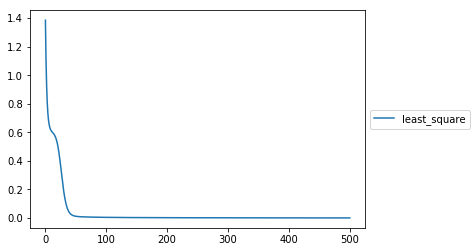

In [220]:
plot_cost_histories([cost_history],labels = [r'least_square'])

To verify my result, I utilize the nonlinear superlearn library from professor's [github](https://github.com/jermwatt/mlrefined/tree/gh-pages/mlrefined_libraries/nonlinear_superlearn_library):

In [221]:
import sys
sys.path.append('../')
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import nonlinear_superlearn_library as nonlib

regress_plotter = nonlib.nonlinear_regression_demos
static_plotter = optlib.static_plotter.Visualizer()
basic_runner = nonlib.basic_runner

First, let us visualize the original data:

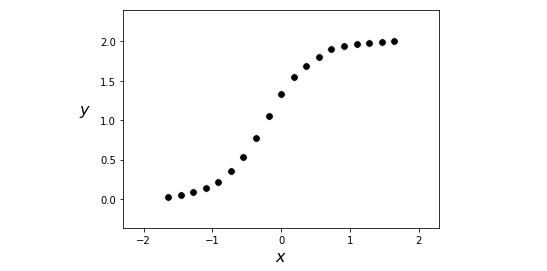

In [222]:
ex10_2 = regress_plotter.Visualizer(data)
ex10_2.plot_data()

Finally, we plot the data along with the ﬁnal ﬁt provided your model together in a singlepanel

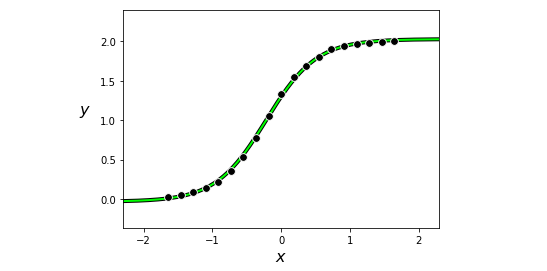

In [223]:
ind = np.argmin(cost_history)
w_best = weight_history[ind]
ex10_2.plot_fit(w_best,model);

# Exercise 10.9: A wavy multi-output dataset

In [873]:
# libraries
from autograd import numpy as np

# import the dataset
csvname = 'datasets/' + 'diagonal_stripes.csv'
data = np.loadtxt(csvname,delimiter=',')

# cut into input/output data
x = data[0:-1,:]
y = data[-1:,:]

In [874]:
x.shape

(2, 300)

In [875]:
y.shape

(1, 300)

In [876]:
x[0].shape

(300,)

In [877]:
import sys
sys.path.append('../')
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import nonlinear_superlearn_library as nonlib

# demos for this notebook
regress_plotter = nonlib.nonlinear_regression_demos
static_plotter = optlib.static_plotter.Visualizer()
basic_runner = nonlib.basic_runner

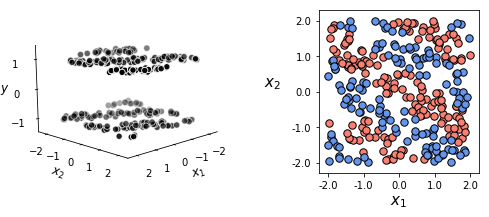

In [878]:
ex10_9 = nonlib.nonlinear_classification_visualizer.Visualizer('datasets/' + 'diagonal_stripes.csv')
ex10_9.plot_data();

First we define the normalization function for $x$:

In [879]:
def standard_normalizer_0(x):
        # compute the mean and standard deviation of the input
        x_means = np.mean(np.reshape(x[0],(300,1)),axis = 0)[:,np.newaxis]
        x_stds = np.std(np.reshape(x[0],(300,1)),axis = 0)[:,np.newaxis]   
        
        # create standard normalizer function
        for i in range(len(x[0])):
            x[0][i] = (x[0][i] - x_means)/ x_stds

        # return normalizer 
        return x
    
def standard_normalizer_1(x):
        # compute the mean and standard deviation of the input
        x_means = np.mean(np.reshape(x[1],(300,1)),axis = 0)[:,np.newaxis]
        x_stds = np.std(np.reshape(x[1],(300,1)),axis = 0)[:,np.newaxis]   
        
        # create standard normalizer function
        for i in range(len(x[1])):
            x[1][i] = (x[1][i] - x_means)/ x_stds

        # return normalizer 
        return x

Then we normailize $x$:

In [880]:
x=standard_normalizer_0(x)
x=standard_normalizer_1(x)

Now we define the feature transforms function, linear combination function of the input data and the softmax function:

In [881]:
def feature_transforms_sin(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return np.sin(a).T

def feature_transforms_cos(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return np.cos(a).T

def feature_transforms(x,w):
    f = np.array([feature_transforms_sin(x,w[0]),feature_transforms_cos(x,w[1])])
    return f
    
def model(x,w):
    # feature transformation 
    f = np.array([feature_transforms_sin(x,w[0]),feature_transforms_cos(x,w[1])])
    
    # compute linear combination and return 
    a = w[2][0] + np.dot(f.T,w[2][1:])
    return a.T

def softmax(w):
        cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))
        return cost/float(np.size(y))

Then we define the gradient descent algorithm:

In [882]:
from autograd import grad 
import autograd.numpy as np   
from autograd import value_and_grad 
import matplotlib.pyplot as plt

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
        if math.fmod(k,1000)==0:
            print(k)
        
    return weight_history,cost_history

Now we define the parameter and minimize the softmax cost function:

In [904]:
w = np.array([np.random.randn(3,1),np.random.randn(3,1),np.random.randn(3,1)])
''' if you want to reproduce the result, please use w = np.array([[[-0.34543377],
                                                                   [-0.9926287 ],
                                                                   [-1.74446982]],

                                                                   [[-0.56273638],
                                                                    [-1.13757993],
                                                                    [ 0.25301986]],

                                                                    [[ 0.91081653],
                                                                    [ 0.8555048 ],
                                                                    [-1.81687487]]])'''

' w = np.array([[[ 1.78314787],\n        [-0.75608914],\n        [ 1.39723943]],\n\n       [[-0.65262646],\n        [-0.4835622 ],\n        [ 2.14101261]],\n\n       [[-0.16338801],\n        [-1.37924442],\n        [ 0.07094043]]])'

In [905]:
g = softmax
max_its = 10000; alpha_choice = 10**(-1)
weight_history,cost_history = gradient_descent(g,alpha_choice,max_its,w)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


Since $w$ is randomized, therefore we want to know in each experiment what $w$ is using and we print it out as following:

In [906]:
w

array([[[-0.34543377],
        [-0.9926287 ],
        [-1.74446982]],

       [[-0.56273638],
        [-1.13757993],
        [ 0.25301986]],

       [[ 0.91081653],
        [ 0.8555048 ],
        [-1.81687487]]])

In [907]:
weight_history[-1]

array([[[ -1.15198913],
        [ -2.31326646],
        [ -3.57390284]],

       [[ -0.39411758],
        [ -0.25352828],
        [  0.53844386]],

       [[  1.03387884],
        [-11.49367406],
        [ -1.40589586]]])

In [908]:
cost_history[-1]

0.04121984381059843

Then we define the cost function history plotter to visualize the cost function history:

In [909]:
%matplotlib inline
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

Now we plot the cost history of softmax cost function:

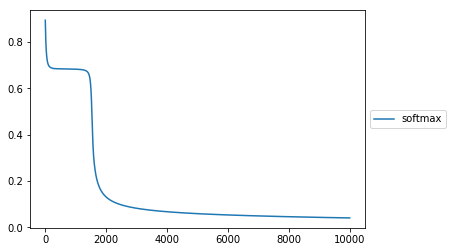

In [910]:
plot_cost_histories([cost_history],labels = [r'softmax'])

Now we compute the prediction of our trained model based on the last round of weight history:

In [911]:
pred = np.sign(model(x,weight_history[-1]))

Now we visualize the prediction and grouth true data:

In [912]:
pred

array([[[-1.,  1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1.,  1.,
          1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,
          1., -1.,  1., -1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,
          1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.,
          1.,  1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1.,  1.,
         -1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1., -1., -1.,
         -1., -1.,  1., -1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,
          1.,  1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1.,
          1.,  1., -1., -1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,
          1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,
          1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,
         -1., -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,
         -1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,
          1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,
          1., -1., -1.,  1., -1., 

In [913]:
y

array([[-1.,  1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,
         1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,
         1., -1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,
        -1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,
         1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,
         1., -1.,  1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1.,  1.,
         1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,
         1.,  1., -1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,
        -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,
         1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
         1., -1., -1., -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,  1.,
        -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,
         1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,  1.,
        -1., -1.,  1., -1., -1., -1.,  1., -1.,  1.

In [914]:
pred[0]

array([[-1.,  1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,
         1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,
         1., -1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,
        -1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,
         1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,
         1., -1.,  1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1.,  1.,
         1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,
         1.,  1., -1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,
        -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,
         1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
         1., -1., -1., -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,  1.,
        -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,
         1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,  1.,
        -1., -1.,  1., -1., -1., -1.,  1., -1.,  1.

In [915]:
np.where(pred[0] != y)

(array([], dtype=int64), array([], dtype=int64))

Now we find the misclassification between prediction and ground truth data and we can see that there are no misclassification, which means that we achieve perfect classiﬁcation on this dataset.

In [923]:
y[np.where(pred[0] != y)]

array([], dtype=float64)

In [918]:
def trained_model_quality(weight_history,max_its):    
    misclassifications_history = [] # misclassification history container
    for k in range(max_its): # for each step
        num_misclassification = 0
        pred = np.sign(model(x,weight_history[-1]))
        for j in range(len(y.T)): # for each y
            if pred[0][0][j] != y[0][j]:# determine whether yhat = y, if not, it means misclassification
                num_misclassification = num_misclassification + 1
        misclassifications_history.append(num_misclassification)
    return misclassifications_history

In [919]:
misclassification = trained_model_quality(weight_history,max_its)

In [921]:
misclassification

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
